In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Mini Project 2/hotel_bookings_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# TUGAS 1 #

## Mengatasi Data Null ##

In [4]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

kolom yang ada data null = 'city','agent','company'

In [5]:
# mengisi data null 
df['city'].fillna(df['city'].mode()[0], inplace = True)
df['agent'].fillna(df['agent'].median(), inplace = True)

## Mengganti Value yang tidak sesuai ##

In [6]:
df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

In [7]:
df['meal'].describe()

count        119390
unique            5
top       Breakfast
freq          92310
Name: meal, dtype: object

mengganti value Full Board menjadi Breakfast + Dinner 

In [8]:
df['meal'] = df['meal'].str.replace('Full Board','Breakfast + Dinner')

In [9]:
df['meal'].value_counts()

Breakfast             92310
Dinner                14463
No Meal               10650
Undefined              1169
Breakfast + Dinner      798
Name: meal, dtype: int64

In [10]:
df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str)

In [11]:
df['total_guest'] = df['adults']+df['children']+df['babies']

In [12]:
df.drop(df[df['adults']+df['babies']+df['children'] == 0].index, inplace = True)

## Membuang data yang tidak diperlukan ##

In [13]:
# menghapus kolom company
columns = ['company']
df.drop(columns, inplace=True, axis=1)

In [14]:
df['reservation_status'].value_counts()

Check-Out    75011
Canceled     42993
No-Show       1206
Name: reservation_status, dtype: int64

No-Show when the customer who has a guaranteed reservation does not cancel it before the hotel's cancellation deadline, and never arrives to claim the reservation.

value No-Show dihapus

In [15]:
df.drop(df[df['reservation_status'] == 'No-Show'].index, inplace = True)

In [16]:
df['reservation_status'].value_counts()

Check-Out    75011
Canceled     42993
Name: reservation_status, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118004 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118004 non-null  object 
 1   is_canceled                     118004 non-null  int64  
 2   lead_time                       118004 non-null  int64  
 3   arrival_date_year               118004 non-null  int64  
 4   arrival_date_month              118004 non-null  object 
 5   arrival_date_week_number        118004 non-null  int64  
 6   arrival_date_day_of_month       118004 non-null  int64  
 7   stays_in_weekend_nights         118004 non-null  int64  
 8   stays_in_weekdays_nights        118004 non-null  int64  
 9   adults                          118004 non-null  int64  
 10  children                        118000 non-null  float64
 11  babies                          118004 non-null  int64  
 12  meal            

In [18]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guest
count,118004.000000,118004.000000,118004.00000,118004.000000,118004.000000,118004.000000,118004.000000,118004.000000,118000.000000,118004.000000,118004.000000,118004.000000,118004.000000,118004.000000,118004.000000,118004.000000,118004.000000,118004.000000,118004.000000,118000.000000
mean,0.364335,104.588344,2018.15674,27.195671,15.786490,0.925325,2.498025,1.861200,0.103898,0.007974,0.031440,0.088022,0.137317,0.218654,76.934087,2.344937,102.025411,0.063193,0.571904,1.973059
std,0.481245,107.103064,0.70799,13.583601,8.776662,0.992322,1.886782,0.575065,0.397709,0.097662,0.174503,0.849120,1.498831,0.638278,106.054125,17.686127,50.483917,0.246528,0.793133,0.717941
min,0.000000,0.000000,2017.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000,1.000000
25%,0.000000,18.000000,2018.00000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.500000,0.000000,0.000000,2.000000
50%,0.000000,70.000000,2018.00000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,95.000000,0.000000,0.000000,2.000000
75%,1.000000,161.000000,2019.00000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000,0.000000,126.000000,0.000000,1.000000,2.000000
max,1.000000,737.000000,2019.00000,53.000000,31.000000,19.000000,50.000000,55.000000,3.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,55.000000


In [19]:
num = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month',
      'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']

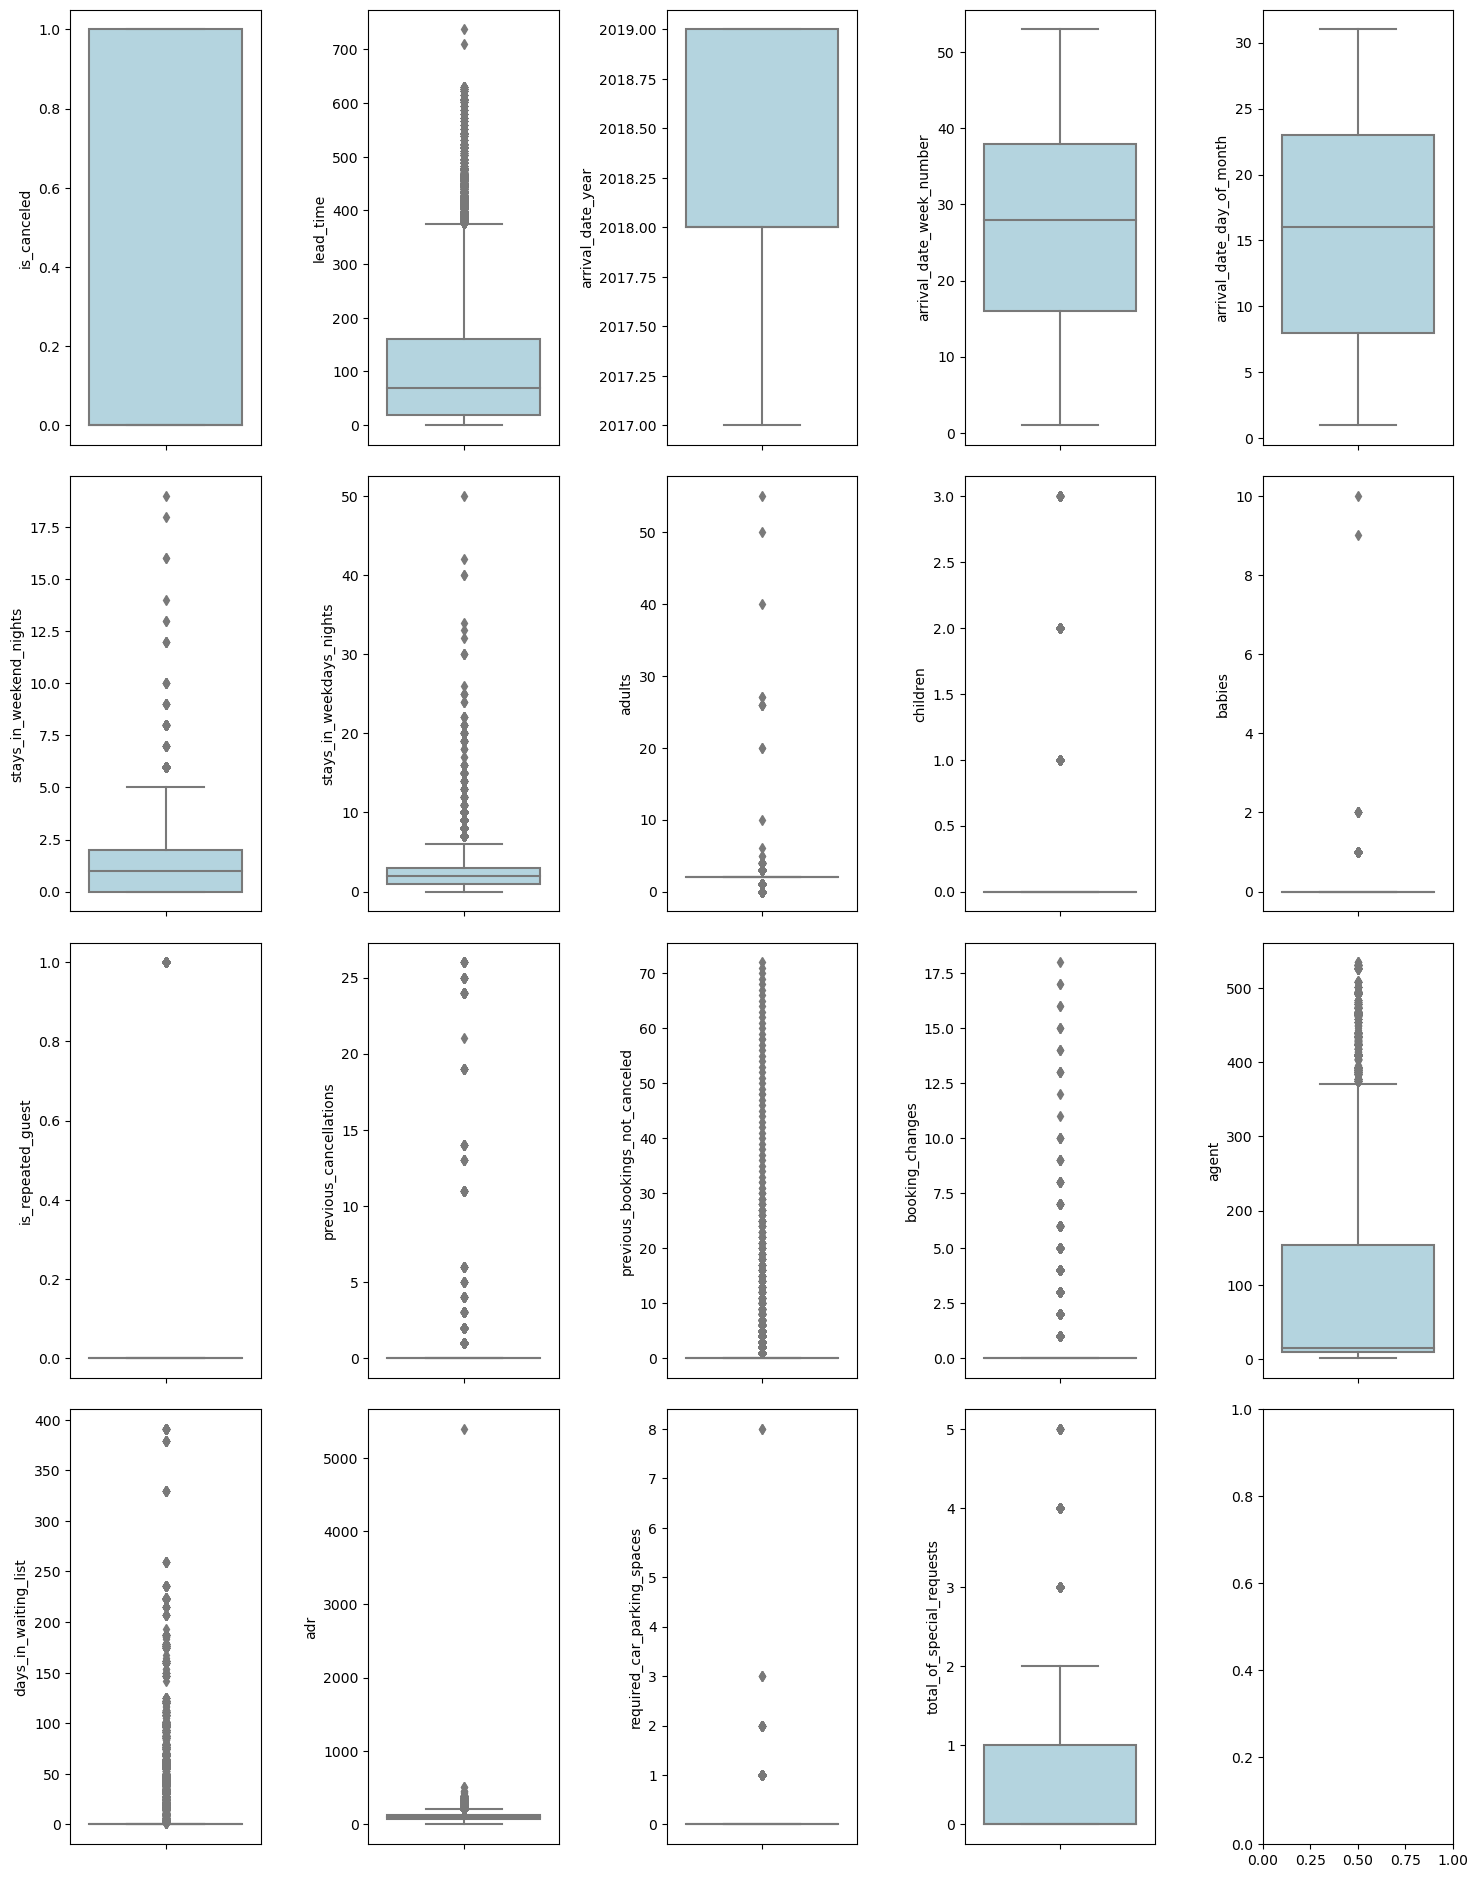

In [20]:
fig, ax = plt.subplots(4, 5, figsize=(15, 19))
for i in range(0, len(num)):
  try:
    plt.subplot(4,5, i+1)
  except ValueError:
    break
  sns.boxplot(y=df[num[i]], color='lightblue', orient='v')
  plt.tight_layout(pad = 1.5)

In [21]:
df['reservation_status'].value_counts()

Check-Out    75011
Canceled     42993
Name: reservation_status, dtype: int64

df.head()

# TUGAS 2 #

## tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel ##

In [22]:
 df.groupby(['arrival_date_month','arrival_date_year','hotel']).agg({'lead_time' : ['count','median','mean']})

lead_time                   
                                                      count median        mean
arrival_date_month arrival_date_year hotel                                    
April              2018              City Hotel        2232   24.0   38.476703
                                     Resort Hotel      1508   14.0   38.222812
                   2019              City Hotel        2529   32.0   64.441281
                                     Resort Hotel      1555   19.0   41.480386
August             2018              City Hotel        3881   98.0  117.628189
                                     Resort Hotel      1359  133.0  128.520971
                   2019              City Hotel        3940  128.0  132.065736
                                     Resort Hotel      1665  135.0  147.027027
December           2017              City Hotel        3372   59.0  102.832444
                                     Resort Hotel      1561   59.0  102.773863
                   2018              City Hotel        4171  102.0  145.223927
                                     Resort Hotel      1970   77.5  128.832995
February           2017              City Hotel        1627   34.0   56.807007
                                     Resort Hotel      1237   24.0   47.743735
                   2018              City Hotel        2442   52.0  104.731777
                                     Resort Hotel      1371   36.0   64.494530
January            2017              City Hotel        1209   41.0   57.805624
                                     Resort Hotel      1089   17.0   37.680441
                   2018              City Hotel        3069   55.0  109.803193
                                     Resort Hotel      1326   29.0   51.852187
July               2018              City Hotel        3622   89.0  116.491441
                                     Resort Hotel      1788  100.0  113.257830
                   2019              City Hotel        4498  104.0  117.269898
                                     Resort Hotel      1740  107.0  129.643678
June               2018              City Hotel        3511   77.0   91.144688
                                     Resort Hotel      1860   54.0   77.018280
                   2019              City Hotel        3895   93.0  107.193325
                                     Resort Hotel      1735   73.0   95.863401
March              2018              City Hotel        1324   20.0   41.512085
                                     Resort Hotel       874    4.0   19.998856
                   2019              City Hotel        2350   38.0   66.112766
                                     Resort Hotel      1298    8.0   30.124807
May                2018              City Hotel        2988   46.0   61.837349
                                     Resort Hotel      1760   27.0   50.847159
                   2019              City Hotel        3358   56.0   84.674211
                                     Resort Hotel      1540   43.0   80.220130
November           2017              City Hotel        3494   68.0  114.827418
                                     Resort Hotel      1577  140.0  144.294864
                   2018              City Hotel        3842   88.0  141.436491
                                     Resort Hotel      1520  184.0  172.109868
October            2017              City Hotel        2459   41.0  114.506710
                                     Resort Hotel      1404   65.0   74.356838
                   2018              City Hotel        3337  127.0  128.422835
                                     Resort Hotel      1679   93.0  108.772484
                   2019              City Hotel        3102  137.0  147.577692
                                     Resort Hotel      1788  110.5  121.324385
September          2017              City Hotel        1375  257.0  182.002909
                                     Resort Hotel      1372   54.0   70.701895
                   20

## normalisasi data ##

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
for col in num:
    transform = MinMaxScaler().fit_transform(df[col].values.reshape(len(df[col]), 1))

## Urutkan data berdasarkan bulan ##

In [ ]:
data1 = df.groupby(['arrival_date_month','arrival_date_year','hotel']).agg({'lead_time' : ['count']})

In [ ]:
data1

lead_time
                                                      count
arrival_date_month arrival_date_year hotel                 
April              2018              City Hotel        2232
                                     Resort Hotel      1508
                   2019              City Hotel        2529
                                     Resort Hotel      1555
August             2018              City Hotel        3881
                                     Resort Hotel      1359
                   2019              City Hotel        3940
                                     Resort Hotel      1665
December           2017              City Hotel        3372
                                     Resort Hotel      1561
                   2018              City Hotel        4171
                                     Resort Hotel      1970
February           2017              City Hotel        1627
                                     Resort Hotel      1237
                   2018              City Hotel        2442
                                     Resort Hotel      1371
January            2017              City Hotel        1209
                                     Resort Hotel      1089
                   2018              City Hotel        3069
                                     Resort Hotel      1326
July               2018              City Hotel        3622
                                     Resort Hotel      1788
                   2019              City Hotel        4498
                                     Resort Hotel      1740
June               2018              City Hotel        3511
                                     Resort Hotel      1860
                   2019              City Hotel        3895
                                     Resort Hotel      1735
March              2018              City Hotel        1324
                                     Resort Hotel       874
                   2019              City Hotel        2350
                                     Resort Hotel      1298
May                2018              City Hotel        2988
                                     Resort Hotel      1760
                   2019              City Hotel        3358
                                     Resort Hotel      1540
November           2017              City Hotel        3494
                                     Resort Hotel      1577
                   2018              City Hotel        3842
                                     Resort Hotel      1520
October            2017              City Hotel        2459
                                     Resort Hotel      1404
                   2018              City Hotel        3337
                                     Resort Hotel      1679
                   2019              City Hotel        3102
                                     Resort Hotel      1788
September          2017              City Hotel        1375
                                     Resort Hotel      1372
                   2018              City Hotel        3086
                                     Resort Hotel      1436
                   2019              City Hotel        3535
                                     Resort Hotel      1744

In [ ]:
month_dict = {'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

In [ ]:
data2 = data1.sort_values('arrival_date_month', key = lambda x : x.apply (lambda x : month_dict[x]))

In [ ]:
data3 = data2.reset_index()

In [ ]:
data3.columns = ['month', 'year', 'hotel', 'count']
data3

,month,year,hotel,count
0,January,2018,Resort Hotel,1326
1,January,2018,City Hotel,3069
2,January,2017,Resort Hotel,1089
3,January,2017,City Hotel,1209
4,February,2018,Resort Hotel,1371
5,February,2018,City Hotel,2442
6,February,2017,Resort Hotel,1237
7,February,2017,City Hotel,1627
8,March,2018,City Hotel,1324
9,March,2019,Resort Hotel,1298


In [ ]:
data3['year'] = data3['year'].astype(str)

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   month   52 non-null     object
 1   year    52 non-null     object
 2   hotel   52 non-null     object
 3   count   52 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.8+ KB


In [ ]:
data3["date"] = data3[["year", "month"]].apply("-".join, axis=1)

In [ ]:
dataa = data3.pivot(index=['date'], columns='hotel', values='count')

In [ ]:
dataa

hotel,City Hotel,Resort Hotel
date,,
2017-December,3372,1561
2017-February,1627,1237
2017-January,1209,1089
2017-November,3494,1577
2017-October,2459,1404
2017-September,1375,1372
2018-April,2232,1508
2018-August,3881,1359
2018-December,4171,1970


In [ ]:
month_dict = {'2017-January':1,
             '2017-February':2,
             '2017-March':3,
             '2017-April':4,
             '2017-May':5,
             '2017-June':6,
             '2017-July':7,
             '2017-August':8,
             '2017-September':9,
             '2017-October':10,
             '2017-November':11,
             '2017-December':12,
             '2018-January':13,
             '2018-February':14,
             '2018-March':15,
             '2018-April':16,
             '2018-May':17,
             '2018-June':18,
             '2018-July':19,
             '2018-August':20,
             '2018-September':21,
             '2018-October':22,
             '2018-November':23,
             '2018-December':24,
             '2019-January':25,
             '2019-February':26,
             '2019-March':27,
             '2019-April':28,
             '2019-May':29,
             '2019-June':30,
             '2019-July':31,
             '2019-August':32,
             '2019-September':33,
             '2019-October':34,
             '2019-November':35,
             '2019-December':36,}

In [ ]:
dataa1 = dataa.sort_values('date', key = lambda x : x.apply (lambda x : month_dict[x]))

In [ ]:
dataa1

hotel,City Hotel,Resort Hotel
date,,
2017-January,1209,1089
2017-February,1627,1237
2017-September,1375,1372
2017-October,2459,1404
2017-November,3494,1577
2017-December,3372,1561
2018-January,3069,1326
2018-February,2442,1371
2018-March,1324,874


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

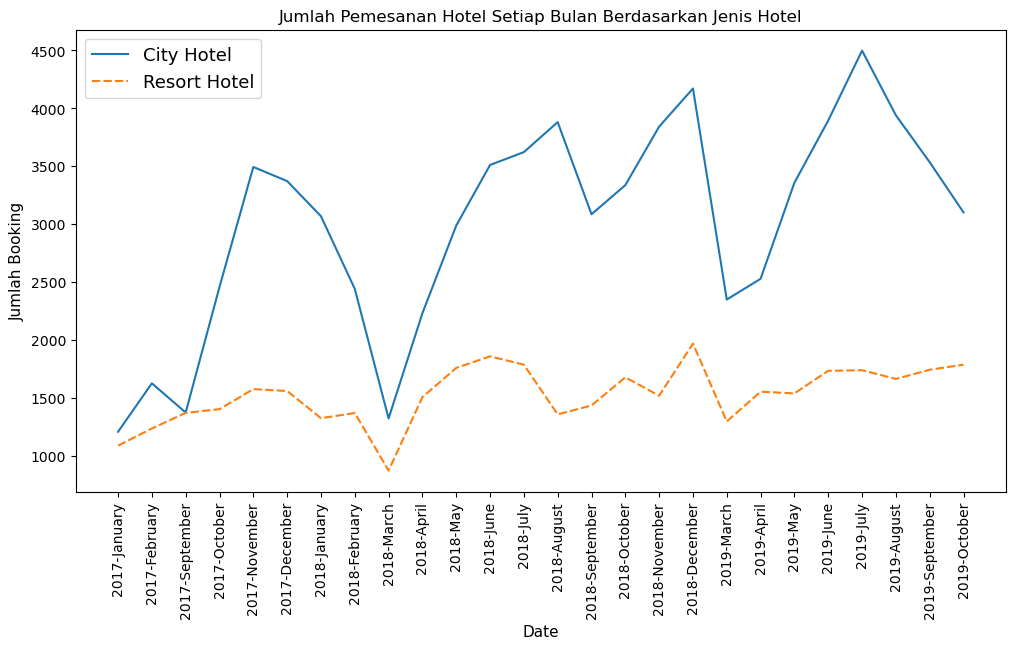

In [48]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dataa1).set(title="Jumlah Pemesanan Hotel Setiap Bulan Berdasarkan Jenis Hotel")
plt.legend(prop={'size':13}) # mengatur judul dan ukuran font pada legenda
plt.xlabel('Date', fontsize=11) # mengatur title pada x-axis 
plt.ylabel('Jumlah Booking', fontsize=11) # mengatur title pada y-axis
plt.xticks(rotation=90)

# TUGAS 3 #

## kolom baru yang berisi total durasi menginap ##

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118004 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118004 non-null  object 
 1   is_canceled                     118004 non-null  int64  
 2   lead_time                       118004 non-null  int64  
 3   arrival_date_year               118004 non-null  int64  
 4   arrival_date_month              118004 non-null  object 
 5   arrival_date_week_number        118004 non-null  int64  
 6   arrival_date_day_of_month       118004 non-null  int64  
 7   stays_in_weekend_nights         118004 non-null  int64  
 8   stays_in_weekdays_nights        118004 non-null  int64  
 9   adults                          118004 non-null  int64  
 10  children                        118000 non-null  float64
 11  babies                          118004 non-null  int64  
 12  meal            

In [50]:
pd.set_option('display.max_columns', None)
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,arrival_date,total_guest
23298,Resort Hotel,0,1,2018,June,17,20,0,1,1,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,314.0,0,Personal,52.00,0,0,Check-Out,2018-June-20,1.0
76469,City Hotel,1,379,2017,December,44,31,1,1,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,1,0,0,Non Refund,1.0,0,Personal,62.00,0,0,Canceled,2017-December-31,2.0
92893,City Hotel,0,65,2018,September,29,12,0,2,1,0.0,0,Breakfast,Kota Jakarta Pusat,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Personal,139.50,0,0,Check-Out,2018-September-12,1.0
75735,City Hotel,1,312,2017,October,35,25,0,4,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,1,0,0,No Deposit,1.0,0,Family,62.00,0,0,Canceled,2017-October-25,2.0
95539,City Hotel,0,11,2018,October,33,13,2,5,2,0.0,0,Breakfast,Kota Batu,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Personal,143.86,0,1,Check-Out,2018-October-13,2.0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118004 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118004 non-null  object 
 1   is_canceled                     118004 non-null  int64  
 2   lead_time                       118004 non-null  int64  
 3   arrival_date_year               118004 non-null  int64  
 4   arrival_date_month              118004 non-null  object 
 5   arrival_date_week_number        118004 non-null  int64  
 6   arrival_date_day_of_month       118004 non-null  int64  
 7   stays_in_weekend_nights         118004 non-null  int64  
 8   stays_in_weekdays_nights        118004 non-null  int64  
 9   adults                          118004 non-null  int64  
 10  children                        118000 non-null  float64
 11  babies                          118004 non-null  int64  
 12  meal            

In [52]:
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']

## tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel ##

In [53]:
df_groupby_canceled = df.groupby('is_canceled')

In [54]:
df_cancel = df_groupby_canceled.get_group(1)
df_cancel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,arrival_date,total_guest,total_stay
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,82.0,0,1,Canceled,2017-September-1,2.0,3
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,0.0,0,Dinner,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,15.0,0,Personal,105.5,0,0,Canceled,2017-September-1,2.0,3
10,Resort Hotel,1,23,2017,September,27,1,0,4,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,123.0,0,0,Canceled,2017-September-1,2.0,4
27,Resort Hotel,1,60,2017,September,27,1,2,5,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,107.0,0,2,Canceled,2017-September-1,2.0,7
32,Resort Hotel,1,96,2017,September,27,1,2,8,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,14.0,0,Personal,108.3,0,2,Canceled,2017-September-1,2.0,10


In [55]:
data22 = df_cancel.groupby(['total_stay', 'hotel']).agg({'hotel' : ['count']})

In [56]:
data22

hotel
                         count
total_stay hotel              
0          City Hotel        6
           Resort Hotel      4
1          City Hotel     3847
           Resort Hotel   1065
2          City Hotel    10291
...                        ...
30         Resort Hotel      3
33         City Hotel        2
           Resort Hotel      1
42         Resort Hotel      1
56         Resort Hotel      1

[63 rows x 1 columns]

In [57]:
data23 = data22.reset_index()

In [58]:
data23.columns = ['total_duration', 'tipe hotel', 'count']
data23

,total_duration,tipe hotel,count
0,0,City Hotel,6
1,0,Resort Hotel,4
2,1,City Hotel,3847
3,1,Resort Hotel,1065
4,2,City Hotel,10291
...,...,...,...
58,30,Resort Hotel,3
59,33,City Hotel,2
60,33,Resort Hotel,1
61,42,Resort Hotel,1


[Text(0.5, 1.0, 'Rasio Pembatalan Pesanan Terhadap Durasi Menginap Untuk Setiap Tipe Hotel')]

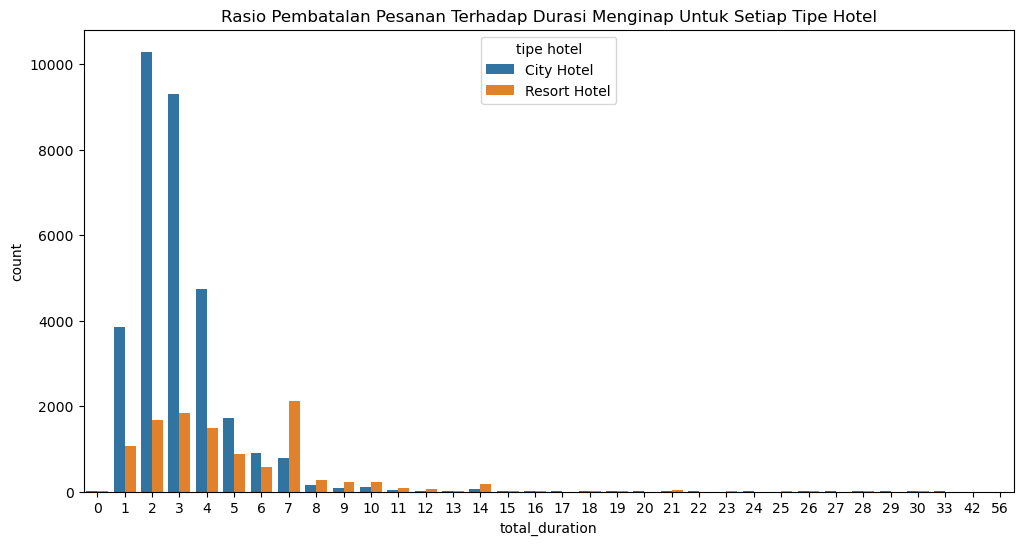

In [60]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data23, x="total_duration", y="count", hue="tipe hotel").set(title='Rasio Pembatalan Pesanan Terhadap Durasi Menginap Untuk Setiap Tipe Hotel')

#plt.figure(figsize=(12, 6))
#sns.lineplot(data=dataa1)
#plt.xticks(rotation=90)

# TUGAS 4 #

In [61]:
df1 = df

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118004 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118004 non-null  object 
 1   is_canceled                     118004 non-null  int64  
 2   lead_time                       118004 non-null  int64  
 3   arrival_date_year               118004 non-null  int64  
 4   arrival_date_month              118004 non-null  object 
 5   arrival_date_week_number        118004 non-null  int64  
 6   arrival_date_day_of_month       118004 non-null  int64  
 7   stays_in_weekend_nights         118004 non-null  int64  
 8   stays_in_weekdays_nights        118004 non-null  int64  
 9   adults                          118004 non-null  int64  
 10  children                        118000 non-null  float64
 11  babies                          118004 non-null  int64  
 12  meal            

In [63]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,arrival_date,total_guest,total_stay
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,14.0,0,Personal,0.0,0,0,Check-Out,2017-September-1,2.0,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,14.0,0,Personal,0.0,0,0,Check-Out,2017-September-1,2.0,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,14.0,0,Personal,75.0,0,0,Check-Out,2017-September-1,1.0,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0,Personal,75.0,0,0,Check-Out,2017-September-1,1.0,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,98.0,0,1,Check-Out,2017-September-1,2.0,2


In [64]:
data24 = df1.groupby(['lead_time']).agg({'hotel' : ['count']})
data24

,hotel
,count
lead_time,
0,6151
1,3371
2,2013
3,1789
4,1679
...,...
622,17
626,30


In [65]:
df1['lead_time'].describe()

count    118004.000000
mean        104.588344
std         107.103064
min           0.000000
25%          18.000000
50%          70.000000
75%         161.000000
max         737.000000
Name: lead_time, dtype: float64

In [66]:
df1['cat_lead_time'] = df1['lead_time']

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118004 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118004 non-null  object 
 1   is_canceled                     118004 non-null  int64  
 2   lead_time                       118004 non-null  int64  
 3   arrival_date_year               118004 non-null  int64  
 4   arrival_date_month              118004 non-null  object 
 5   arrival_date_week_number        118004 non-null  int64  
 6   arrival_date_day_of_month       118004 non-null  int64  
 7   stays_in_weekend_nights         118004 non-null  int64  
 8   stays_in_weekdays_nights        118004 non-null  int64  
 9   adults                          118004 non-null  int64  
 10  children                        118000 non-null  float64
 11  babies                          118004 non-null  int64  
 12  meal            

In [68]:
import numpy as np

cat_leadtime = df1["cat_lead_time"]

cond_list = [cat_leadtime == 0,
             cat_leadtime < 7,
             cat_leadtime == 7,
             cat_leadtime < 30, 
             cat_leadtime == 30, 
             cat_leadtime <= 60, 
             cat_leadtime <= 90, 
             cat_leadtime <= 120,
             cat_leadtime <= 150, 
             cat_leadtime <= 180, 
             cat_leadtime <= 210, 
             cat_leadtime <= 240,
             cat_leadtime <= 270,
             cat_leadtime <= 300,
             cat_leadtime <= 365,
             cat_leadtime <= 737]
choice_list = ["at the time",
               "days", 
               "1 weeks",
               "weeks",
               "1 month",
               "2 month",
               "3 month",
               "4 month",
               "5 month",
               "6 month",
               "7 month",
               "8 month",
               "9 month",
               "10 month",
               "1 year",
               "2 years"]

df1["cat_lead_time"] = np.select(cond_list, choice_list)

In [69]:
df1["cat_lead_time"].value_counts()

weeks          18035
2 month        16781
3 month        12483
days           11820
4 month        10299
5 month         8037
6 month         7832
at the time     6151
7 month         5624
1 year          4729
8 month         4292
10 month        3419
9 month         3393
2 years         3146
1 weeks         1318
1 month          645
Name: cat_lead_time, dtype: int64

In [70]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,arrival_date,total_guest,total_stay,cat_lead_time
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,14.0,0,Personal,0.0,0,0,Check-Out,2017-September-1,2.0,0,1 year
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,14.0,0,Personal,0.0,0,0,Check-Out,2017-September-1,2.0,0,2 years
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,14.0,0,Personal,75.0,0,0,Check-Out,2017-September-1,1.0,1,1 weeks
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0,Personal,75.0,0,0,Check-Out,2017-September-1,1.0,1,weeks
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,98.0,0,1,Check-Out,2017-September-1,2.0,2,weeks


## tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap jarak waktu pemesanan untuk setiap jenis hotel ##

In [71]:
df1_groupby_canceled = df1.groupby('is_canceled')

In [72]:
df1_cancel = df1_groupby_canceled.get_group(1)
df1_cancel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,arrival_date,total_guest,total_stay,cat_lead_time
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,82.0,0,1,Canceled,2017-September-1,2.0,3,3 month
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,0.0,0,Dinner,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,15.0,0,Personal,105.5,0,0,Canceled,2017-September-1,2.0,3,3 month
10,Resort Hotel,1,23,2017,September,27,1,0,4,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,123.0,0,0,Canceled,2017-September-1,2.0,4,weeks
27,Resort Hotel,1,60,2017,September,27,1,2,5,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,107.0,0,2,Canceled,2017-September-1,2.0,7,2 month
32,Resort Hotel,1,96,2017,September,27,1,2,8,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,14.0,0,Personal,108.3,0,2,Canceled,2017-September-1,2.0,10,4 month


In [73]:
data26 = df1_cancel.groupby(['hotel', 'cat_lead_time']).agg({'lead_time' : ['count']})
data26        

lead_time
                               count
hotel        cat_lead_time          
City Hotel   1 month             174
             1 weeks             111
             1 year             2757
             10 month           1856
             2 month            4476
             2 years            1922
             3 month            3614
             4 month            3366
             5 month            2456
             6 month            2703
             7 month            1768
             8 month            1273
             9 month            1229
             at the time         188
             days                761
             weeks              3510
Resort Hotel 1 month              56
             1 weeks              50
             1 year              514
             10 month            347
             2 month            1527
             2 years             206
             3 month            1259
             4 month            1149
             5 month            1018
             6 month             875
             7 month             760
             8 month             744
             9 month             617
             at the time         116
             days                313
             weeks              1278

In [74]:
data27 = data26.reset_index()

In [75]:
data27.columns = ['hotel', 'cat_lead_time', 'count']
data27

,hotel,cat_lead_time,count
0,City Hotel,1 month,174
1,City Hotel,1 weeks,111
2,City Hotel,1 year,2757
3,City Hotel,10 month,1856
4,City Hotel,2 month,4476
5,City Hotel,2 years,1922
6,City Hotel,3 month,3614
7,City Hotel,4 month,3366
8,City Hotel,5 month,2456
9,City Hotel,6 month,2703


In [76]:
data28 = data27.pivot(index=['cat_lead_time'], columns='hotel', values='count')

In [77]:
month_dict = {"at the time": 1,
               "days": 2, 
               "1 weeks": 3,
               "weeks": 4,
               "1 month": 5,
               "2 month": 6,
               "3 month": 7,
               "4 month": 8,
               "5 month": 9,
               "6 month": 10,
               "7 month": 11,
               "8 month": 12,
               "9 month": 13,
               "10 month": 14,
               "1 year": 15,
               "2 years": 16}

In [78]:
data29 = data28.sort_values('cat_lead_time', key = lambda x : x.apply (lambda x : month_dict[x]))

In [79]:
data29

hotel,City Hotel,Resort Hotel
cat_lead_time,,
at the time,188,116
days,761,313
1 weeks,111,50
weeks,3510,1278
1 month,174,56
2 month,4476,1527
3 month,3614,1259
4 month,3366,1149
5 month,2456,1018


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

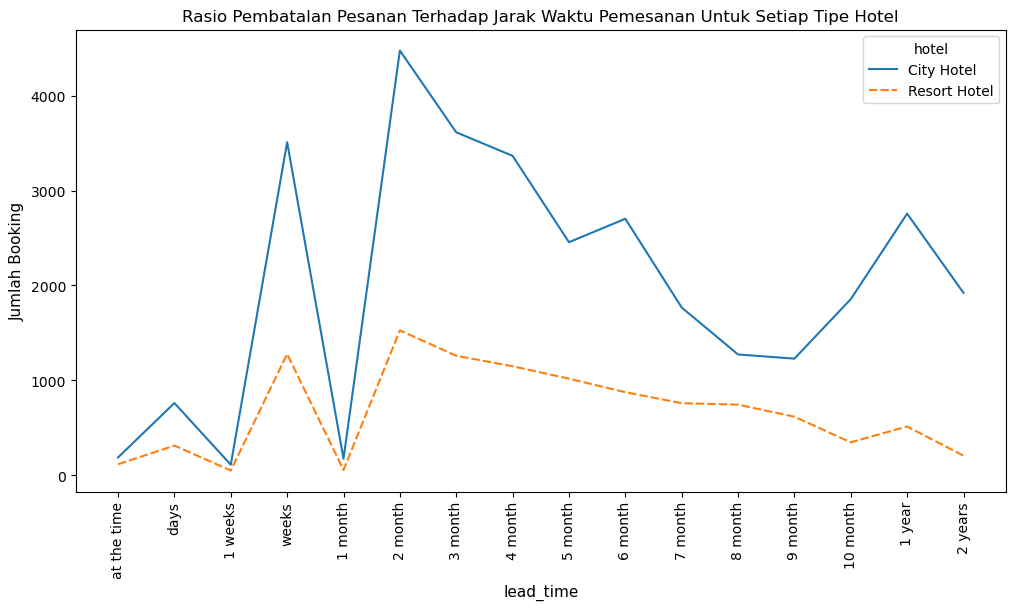

In [81]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data29).set(title='Rasio Pembatalan Pesanan Terhadap Jarak Waktu Pemesanan Untuk Setiap Tipe Hotel')
plt.xlabel('lead_time', fontsize=11) # mengatur title pada x-axis 
plt.ylabel('Jumlah Booking', fontsize=11) # mengatur title pada y-axis
plt.xticks(rotation=90)